In [1]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [3]:
import pandas as pd
import urllib.request
#네이버 쇼핑 리뷰 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [5]:
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [7]:
reviews=total_data["reviews"]
reviews

0                                                   배공빠르고 굿
1                             택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2         아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3         선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                         민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
                                ...                        
199995                                      장마라그런가!!! 달지않아요
199996    다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997                      로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998                                        넘이쁘고 쎄련되보이네요~
199999     아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다
Name: reviews, Length: 200000, dtype: object

In [41]:
# 전체 리뷰 중 일부만 샘플링 (예: 10,000개)
sampled_reviews = reviews[:1000]

message = ''
for review in sampled_reviews:
    message += re.sub(r'[^\w가-힣]', ' ', review) + ' '

print(message)

배공빠르고 굿 택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고 아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다  바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다  전화했더니 바로주신다했지만 배송도 누락되어있었네요   확인안하고 바로 선물했으면 큰일날뻔했네요  이렇게 배송이 오래걸렸으면 사는거 다시 생각했을거같아요 아쉽네요   민트색상 예뻐요  옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ 비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적으로 보였는데 생각보다 진짜 별로입니다  주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화도 안되고 아무런 연락을 받을수가 없으니 답답하신 분들은 다른곳에서 사시는거 추천드립니다 넉넉한 길이로 주문했는데도 안 맞네요 별로예요 보폴이 계속 때처럼 나오다가 지금은 안나네요  110인데 전문속옷브랜드 위생팬티105보다 작은듯해요  불편해요  밴딩부분이 다 신축성없는 일반실로 되어있어 빅사이즈임에도 빅사이즈같지않아요  입고벗을때 편하게 밴딩부분이 늘어나고 입었을때도 밴딩이 잡아주어야하는데 말이죠  사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ 베이지 색 구매했는데 약간 살색에 가까워요 화면빨인가봐요   노란컬러가 돋보여요   저렴한맛에 그냥 씁니다 별루 ㅏㅛㅇ치ㅗ티ㅓ치ㅗ탛캏타ㅗ티ㅗ티ㅗ티ㅛ티ㅛ티ㅗㅗㅗ치ㅕ치ㅕ쳐ㅣ처ㅣ치ㅓ처ㅣ펴ㅣ쳐ㅣ치ㅕㅐㅛㅌ쵸ㅔ려ㅔㅎ 촉감도 좋고 무게감이나 핏도 편합니다 불멍하기좋고 사이즈도 너무 좋아요 재구매 친구들이 좋은 향 난다고 해요 실내에서 신는건지 몰랐어요 재구매 다 좋은데 하나가 이상하네요 가게를 운영하는 사장님께서 대신 구매 해달라고 하셔서 구매하게되었는데 가게에 달아놓으니까 이쁘네요 가성비 괜찮습니다 바퀴가 고정된다면 별다섯개짜린데    화장이 깨끗하게 지워지지않아요 거품이생기고 오랫동안 문질러서 씻어내야하지만 세정력이 별로인듯해요 남자 애들 인

In [113]:
from PIL import Image, ImageFilter
import numpy as np
tokki=Image.open('C:/Users/user/0Data/0923_text/5.png')
# tokki = tokki.filter(ImageFilter.GaussianBlur(2))
tokki = np.array(tokki)
tokki

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

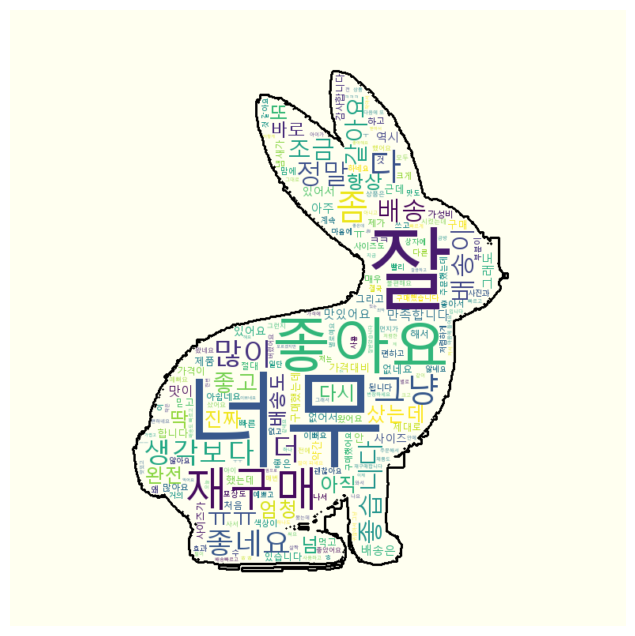

In [115]:
from PIL import Image
import numpy as np
# tokki=np.array(Image.open('C:/Users/user/0Data/0923_text/5.png'))
wc = WordCloud(
    font_path = "c:/Windows/fonts/malgun.ttf",  # 한국어 폰트 경로
    mask=tokki,
    background_color='ivory',
    contour_color='black',
    contour_width=2,
    width=800, 
    height=600
).generate(message)

# 워드클라우드 출력
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

In [ ]:
message = ''
for reivew in reviews:
        message = message + re.sub(r'[^\w]', ' ', reivew) +''
message #작업 내용 확인용 출력